In [1]:
%reset -f

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.datasets.mnist import load_data
from keras.layers import LeakyReLU
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam_v2

># Codage de la fonction

In [2]:
# def sampling(mu,sigma):
#     n = tf.shape(mu)
#     epsilon1 = np.rand(n)
#     epsilon2 = np.rand(n)
#     epsilon = np.zeros((n,2))
#     for i in range(n):
#         epsilon[i][0] = epsilon1[i]
#         epsilon[i][1] = epsilon2[i]
    
#     epsilon = convert_to_tensor(epsilon)
#     z = convert_to_tensor(np.zeros((n,2)))
#     z = mu + sigma*epsilon
#     return z

### correction

In [3]:
# def sampling1(mu,sigma):
#     dim = tf.shape(mu)
#     epsilon = tf.random.normal(dim)
#     z = mu + sigma*epsilon
#     return z

In [2]:
def sampling(mu_sigma):
    """mu_sigma une liste contenant mu et sigma"""
    dim = tf.shape(mu_sigma[0])
    epsilon=(tf.random.normal(dim))
    mu = mu_sigma[0]
    sigma = mu_sigma[1]
    z = mu + sigma*epsilon
    return z

># Construction du modèle

In [5]:
# model = tf.keras.Sequential([
#     layers.Input(shape=(784,)),
#     layers.Dense(256,activation='relu')
#     layers.Dense(2,)
# ])

# #marche pas

In [61]:
# Encodeur
x0 = Input(shape=(784,))
x1 = Dense(256,activation='relu')(x0)
mu = Dense(2,activation='relu')(x1)
sigma = Dense(2,activation='relu')(x1)

# Decodeur
z = tf.keras.layers.Lambda(sampling)([mu,sigma])
x4 = Dense(256,activation='relu')(z)
x5 = Dense(784,activation='sigmoid')(x4)

model = Model(inputs=x0,outputs=x5)
encodeur = Model(inputs=x0,outputs=z)

#  
decodeur_input = Input(shape=(2,))
x4_decoded = Dense(256,activation='relu')(decodeur_input)
x5_decoded = Dense(784,activation='sigmoid')(x4_decoded)

decodeur = Model(inputs=decodeur_input,outputs=x5_decoded)
VAE = Model(inputs=x0,outputs=decodeur(encodeur(x0)))

### Loss

In [62]:
loss = (
    1000*tf.reduce_mean(tf.math.square(x0-decodeur(encodeur(x0))))
    + tf.reduce_mean(tf.math.square(mu))
    + tf.reduce_mean(tf.math.square(sigma-1))
)

VAE.add_loss(loss)

In [8]:
# kl_loss = -0.5 * tf.reduce_sum(1 + sigma - tf.square(mu) - tf.exp(sigma), axis=1)
# kl_loss = tf.reduce_mean(kl_loss)

# # Calcul de la perte de reconstruction
# reconstruction_loss = tf.reduce_mean(tf.square(x0 - x5_decoded))

# # Perte totale
# total_loss = reconstruction_loss + kl_loss

# # Ajout de la la loss
# VAE.add_loss(total_loss)

# # de la merde 

### Compilation du modèle

In [63]:
# VAE.compile(optimizer=adam_v2.Adam(learning_rate=0.001))
VAE.compile(optimizer='adam')

In [6]:
encodeur.summary()
decodeur.summary()
VAE.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          200960      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2)            514         dense[0][0]                      
__________________________________________________________________________________________________
tf.compat.v1.shape (TFOpLambda) (2,)                 0           dense_1[0][0]                    
____________________________________________________________________________________________

># Chargement des données

In [7]:
(X_train,y_train), (X_test, y_test) = load_data()

In [12]:
# X_train = X_train.reshape((60000,784))

### Normalisation des données

In [8]:
X_train = X_train[:50000,:,:]
X_val = X_train[50000:,:,:]

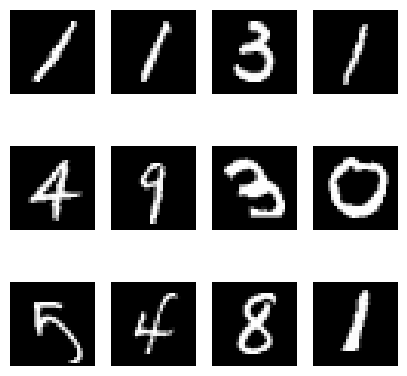

In [9]:
# Create a figure with 3x3 subplots
fig, axes = plt.subplots(3, 4, figsize=(5, 5))
# Loop through the images and display them in the subplots
for i, ax in enumerate(axes.ravel()):
    idx = np.random.randint(0,X_train.shape[0] - 1)
    ax.imshow(X_train[idx], cmap = 'gray')
    ax.axis('off')
plt.show()

In [10]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_train = X_train/255.0
print(X_train.shape)

X_val = X_val.reshape((X_val.shape[0],X_val.shape[1]*X_val.shape[2]))
X_val = X_val/255.0
print(X_val.shape)

(50000, 784)
(0, 784)


In [18]:
# X_train = X_train.astype('float32')/255.0

In [19]:
# X_train = 2*X_train-1

># Fit du modèle

In [64]:
hist = VAE.fit(X_train,X_train,epochs=20,batch_size=500,validation_data=(X_val,X_val))

Epoch 1/20
167/167 [==============================] - 2s 7ms/step - loss: 122.6266
Epoch 2/20
167/167 [==============================] - 1s 5ms/step - loss: 64.9306
Epoch 3/20
167/167 [==============================] - 1s 5ms/step - loss: 60.0710
Epoch 4/20
167/167 [==============================] - 1s 5ms/step - loss: 57.4734
Epoch 5/20
167/167 [==============================] - 1s 5ms/step - loss: 56.6475
Epoch 6/20
167/167 [==============================] - 1s 5ms/step - loss: 55.8420
Epoch 7/20
167/167 [==============================] - 1s 5ms/step - loss: 54.6335
Epoch 8/20
167/167 [==============================] - 1s 5ms/step - loss: 53.7661
Epoch 9/20
167/167 [==============================] - 1s 5ms/step - loss: 53.0162
Epoch 10/20
167/167 [==============================] - 1s 4ms/step - loss: 52.5377
Epoch 11/20
167/167 [==============================] - 1s 4ms/step - loss: 52.1223
Epoch 12/20
167/167 [==============================] - 1s 4ms/step - loss: 51.5751
Epoch 13/20


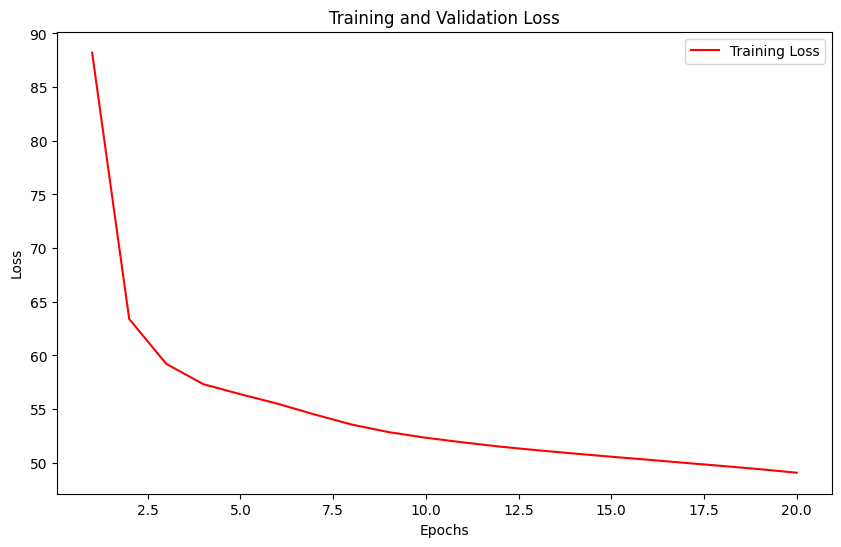

In [65]:
train_loss = hist.history['loss']
#val_loss = hist.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r', label='Training Loss')
#plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

X_test = X_test/255.0

In [66]:
y_p = VAE.predict(X_test)

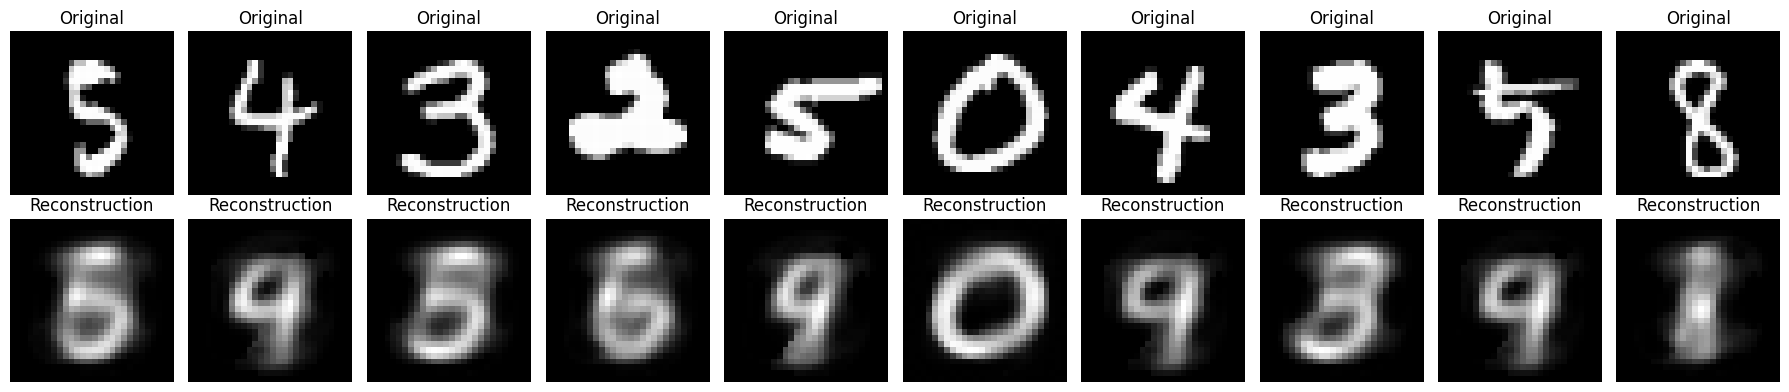

In [67]:
# Utiliser l'autoencodeur pour obtenir des reconstructions des données de test
reconstructed_images = y_p

# Choisir un échantillon d'images de test à afficher
num_images_to_display = 10
random_indices = np.random.choice(range(len(X_test)), num_images_to_display)

# Afficher les images originales et leurs reconstructions
plt.figure(figsize=(18, 4))
for i, image_index in enumerate(random_indices):
    # Image originale
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Reconstruction
    plt.subplot(2, num_images_to_display, i + 1 + num_images_to_display)
    plt.imshow(reconstructed_images[image_index].reshape(28, 28), cmap='gray')
    plt.title("Reconstruction")
    plt.axis('off')

plt.tight_layout()
plt.show()

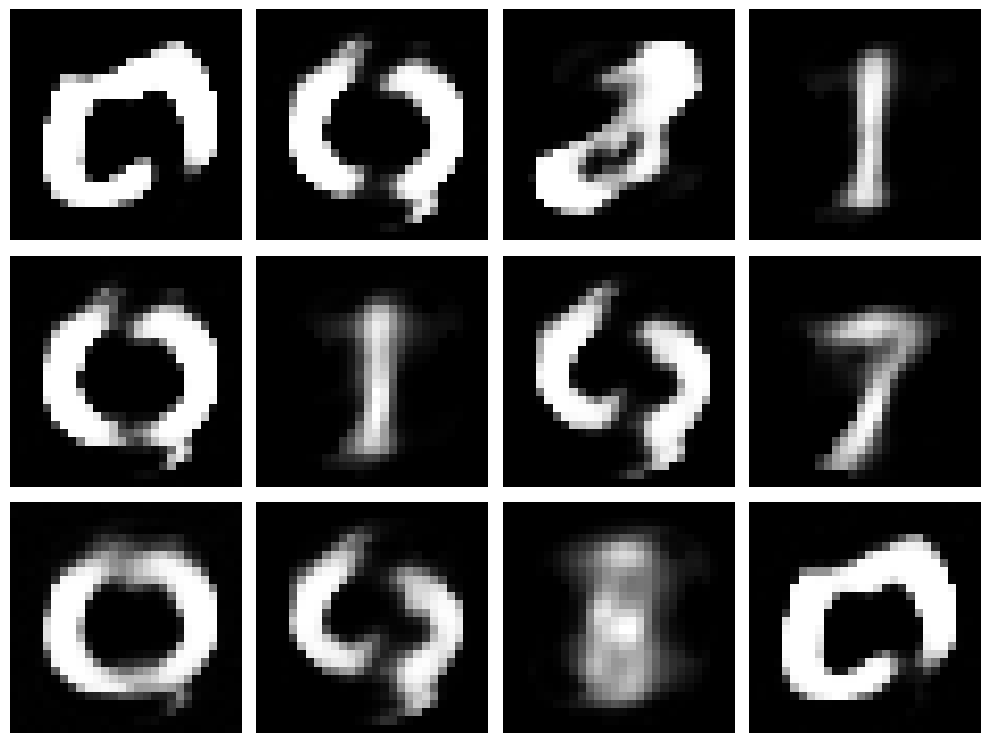

In [69]:
# Générer de nouveaux individus
num_samples = 12
# Nombre d'individus à générer
latent_space_samples = np.random.normal(size=(num_samples, 2))  # Générer des échantillons dans l'espace latent
generated_images = decodeur.predict(latent_space_samples)


plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

># Représentation de l'espace latent

#### on fait des trucs blablabla

># Nouvelle fonction sampling

In [71]:
def sampling_kl(mu_sigma):
    """mu_sigma une liste contenant mu et sigma"""
    dim = tf.shape(mu_sigma[0])
    epsilon=(tf.random.normal(dim))
    mu = mu_sigma[0]
    sigma = mu_sigma[1]
    z = mu + tf.math.exp(1/2*tf.math.log(tf.math.square(sigma)))*epsilon
    return z

># Nouvelle construction du modèle

In [77]:
# Encodeur
x0 = Input(shape=(784,))
x1 = Dense(256,activation='relu')(x0)
mu = Dense(2,activation='relu')(x1)
sigma = Dense(2,activation='relu')(x1)

# Decodeur
z = tf.keras.layers.Lambda(sampling_kl)([mu,sigma])
x4 = Dense(256,activation='relu')(z)
x5 = Dense(784,activation='sigmoid')(x4)

model = Model(inputs=x0,outputs=x5)
encodeur = Model(inputs=x0,outputs=z)

#  
decodeur_input = Input(shape=(2,))
x4_decoded = Dense(256,activation='relu')(decodeur_input)
x5_decoded = Dense(784,activation='sigmoid')(x4_decoded)

decodeur = Model(inputs=decodeur_input,outputs=x5_decoded)
VAE = Model(inputs=x0,outputs=decodeur(encodeur(x0)))

## loss 

In [78]:
loss = (
    1000*tf.reduce_mean(tf.math.square(x0-decodeur(encodeur(x0))))
    + tf.reduce_mean(tf.math.square(mu))
    + tf.reduce_mean(tf.math.square(sigma-1))
)

VAE.add_loss(loss)

## compilation du modèle

In [79]:
# VAE.compile(optimizer=adam_v2.Adam(learning_rate=0.001))
VAE.compile(optimizer='adam')

## fit du modèle

In [80]:
hist = VAE.fit(X_train,X_train,epochs=20,batch_size=500,validation_data=(X_val,X_val))

Epoch 1/20
100/100 [==============================] - 3s 10ms/step - loss: nan
Epoch 2/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 3/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 4/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 5/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 6/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 7/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 8/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 9/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 10/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 11/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 12/20
100/100 [==============================] - 1s 6ms/step - loss: nan
Epoch 13/20
100/100 [==============================] - 1s 6m

## prediction

In [81]:
y_p = VAE.predict(X_test)

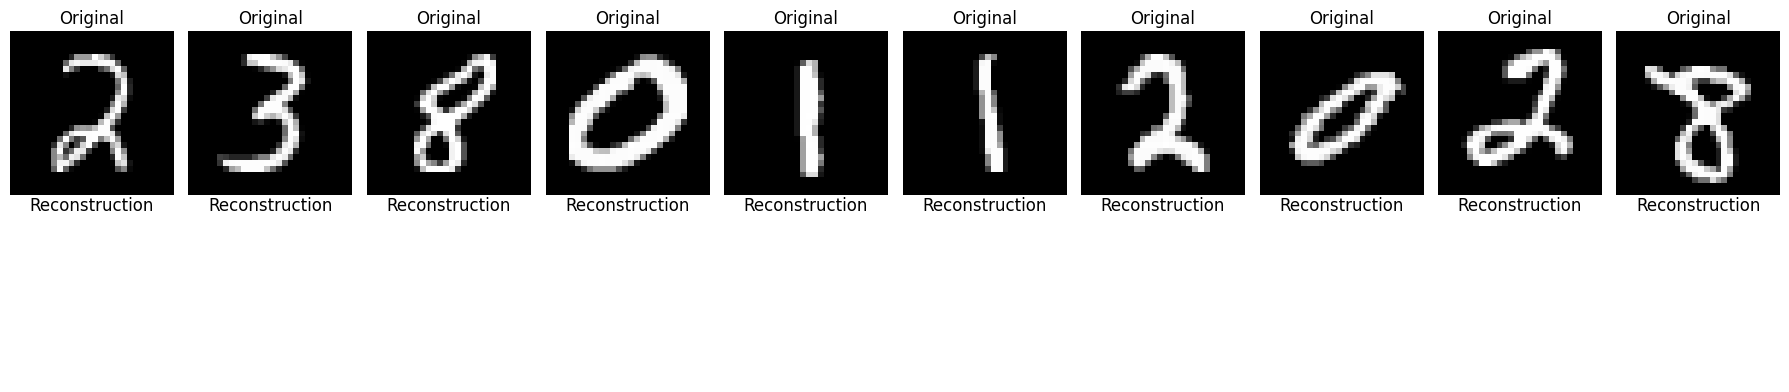

In [82]:
# Utiliser l'autoencodeur pour obtenir des reconstructions des données de test
reconstructed_images = y_p

# Choisir un échantillon d'images de test à afficher
num_images_to_display = 10
random_indices = np.random.choice(range(len(X_test)), num_images_to_display)

# Afficher les images originales et leurs reconstructions
plt.figure(figsize=(18, 4))
for i, image_index in enumerate(random_indices):
    # Image originale
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Reconstruction
    plt.subplot(2, num_images_to_display, i + 1 + num_images_to_display)
    plt.imshow(reconstructed_images[image_index].reshape(28, 28), cmap='gray')
    plt.title("Reconstruction")
    plt.axis('off')

plt.tight_layout()
plt.show()